!pip install fredapi > /dev/null

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

Create the Fred object with the API key

In [18]:
from full_fred.fred import Fred

fred = Fred(r"C:\Users\Austin\Documents\Website\Projects\Python\fredAPIkey.txt")

fred.get_api_key_file()

'C:\\Users\\Austin\\Documents\\Website\\Projects\\Python\\fredAPIkey.txt'

Retrieve the SP 500 data

In [56]:
sp500 = fred.get_series_df(series_id = 'SP500')
sp500.head(), sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  2610 non-null   object
 1   realtime_end    2610 non-null   object
 2   date            2610 non-null   object
 3   value           2610 non-null   object
dtypes: object(4)
memory usage: 81.7+ KB


(  realtime_start realtime_end        date    value
 0     2024-01-16   2024-01-16  2014-01-13  1819.20
 1     2024-01-16   2024-01-16  2014-01-14  1838.88
 2     2024-01-16   2024-01-16  2014-01-15  1848.38
 3     2024-01-16   2024-01-16  2014-01-16  1845.89
 4     2024-01-16   2024-01-16  2014-01-17  1838.70,
 None)

Convert the columns to the correct data type and drop rows with incomplete data

In [59]:
sp500[['realtime_start', 'realtime_end', 'date']] = sp500[['realtime_start', 'realtime_end', 'date']].apply(pd.to_datetime)
sp500 = sp500[sp500.value != '.']
sp500['value'] = sp500['value'].astype('float')
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2609
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  2518 non-null   datetime64[ns]
 1   realtime_end    2518 non-null   datetime64[ns]
 2   date            2518 non-null   datetime64[ns]
 3   value           2518 non-null   float64       
dtypes: datetime64[ns](3), float64(1)
memory usage: 98.4 KB


C:\Users\Austin\AppData\Local\Temp\ipykernel_10836\3656559292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['value'] = sp500['value'].astype('float')


Plot the Data

<Axes: title={'center': 'SP 500'}, xlabel='date'>

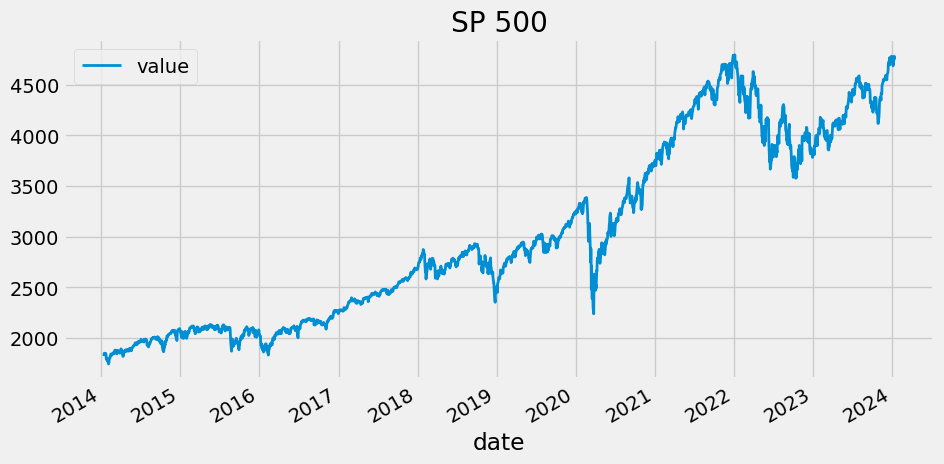

In [60]:
sp500.plot(x = 'date', 
           y = 'value', 
           figsize = (10, 5), 
          title = 'SP 500', 
          lw = 2)

Pul the Unemployement Rate data

In [73]:
unrate = fred.get_series_df('UNRATE')
unrate.info(), unrate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  912 non-null    object
 1   realtime_end    912 non-null    object
 2   date            912 non-null    object
 3   value           912 non-null    object
dtypes: object(4)
memory usage: 28.6+ KB


(None,
   realtime_start realtime_end        date value
 0     2024-01-16   2024-01-16  1948-01-01   3.4
 1     2024-01-16   2024-01-16  1948-02-01   3.8
 2     2024-01-16   2024-01-16  1948-03-01   4.0
 3     2024-01-16   2024-01-16  1948-04-01   3.9
 4     2024-01-16   2024-01-16  1948-05-01   3.5)

In [74]:
unrate[['realtime_start', 'realtime_end', 'date']] = unrate[['realtime_start', 'realtime_end', 'date']].apply(pd.to_datetime)
unrate['value'] = unrate['value'].astype('float')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  912 non-null    datetime64[ns]
 1   realtime_end    912 non-null    datetime64[ns]
 2   date            912 non-null    datetime64[ns]
 3   value           912 non-null    float64       
dtypes: datetime64[ns](3), float64(1)
memory usage: 28.6 KB


Plot the Unemployment Rate

<Axes: xlabel='date'>

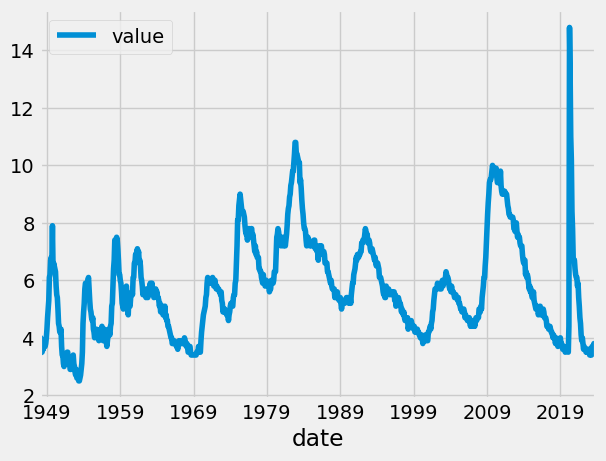

In [78]:
unrate.plot(x = 'date', 
           y = 'value')

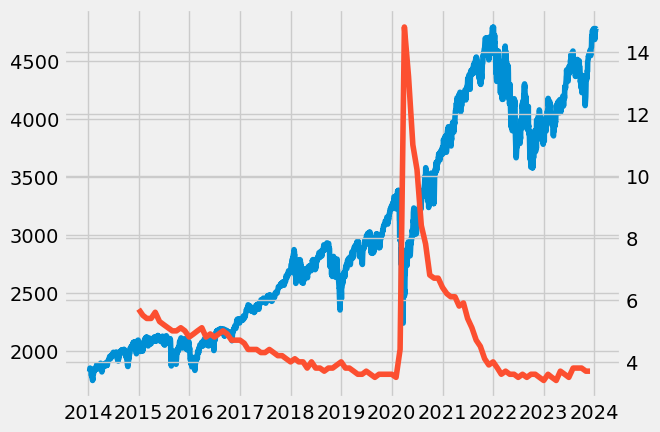

In [117]:
fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.plot(sp500['date'], 
          sp500['value'],  
          label = 'SP 500')

ax2.plot(unrate[unrate.date.dt.year > 2014]['date'], 
           unrate[unrate.date.dt.year > 2014]['value'], 
           label = 'Unemployment', 
            color = color_pal[1])